# Math Behind Linear Regession #

In this notebook we will learn:

- About residuals
- About the root mean square error (RMSE) of a regression line
- What the assumptions are for a linear regression
- How to check/verify that the assumptions for a linear regression are met
- How to use a regression model to make predictions
- The difference between interpolation and extrapolation


In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import scipy.stats as stats
import scipy

from IPython.core.display import display, HTML
toggle_code_str2 = '''
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Figure Code"></form>
'''

toggle_code_prepare_str2 = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>

'''

#display(HTML(toggle_code_prepare_str2 + toggle_code_str2))

def hide_code_figure():
    display(HTML(toggle_code_str2))
    
from IPython.core.display import display, HTML
toggle_code_str = '''
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Hide/Show Code (Too Advanced or Not the Point)"></form>
'''

toggle_code_prepare_str = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>

'''

display(HTML(toggle_code_prepare_str + toggle_code_str))

def hide_code():
    display(HTML(toggle_code_str))

## Predictions from Linear Regression ##

If $\hat{y} = b_1\cdot x + b_0$ is our regression equation, then we find predicted values of $y$, (denoted $\hat{y}$) by plugging x-values into the equation.  

For example, $\hat{msrp} = 75448-1038\cdot mpg$.  So the predicted msrp for a car that gets 60 miles to the gallon is $\hat{msrp} = 75448-1038\cdot 60 \approx 13168$

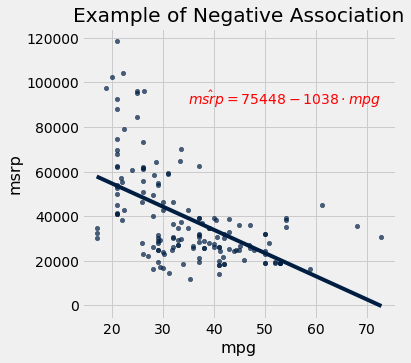

In [2]:
hybrid = Table.read_table('hybrid.csv')

hybrid.scatter('mpg', 'msrp', fit_line=True)
plots.title("Example of Negative Association")
plots.text(35, 90000,"$\hat{msrp} = 75448-1038\cdot mpg$", color='red');

In [3]:
hybrid.show(3)

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact


When a y-hat has a subscript, that means it is a predicted value for an x-value that really occurs in our data set.  Let's use the hybrid data as an example again.  

Taking the data in its current order, the first mpg listed is 41.26.  So $mpg_1 = 41.26$. Then $mpg_2 = 54.1$ and so on.  At the same time, $msrp_1 = 24509.7$.  However, $\hat{msrp}_1 = 32620.12$

## Residuals ##

For each datum the residual is $e_i = y_i- \hat{y}_i$.

We use the letter $e$ for a residual for two reasons:

1. The letter $e$ can stand for *error*, which is what a residual is.  It is the error in the approximation.

2. We're already using $r$ for the correlation coefficient, so we can't use it again here, can we?





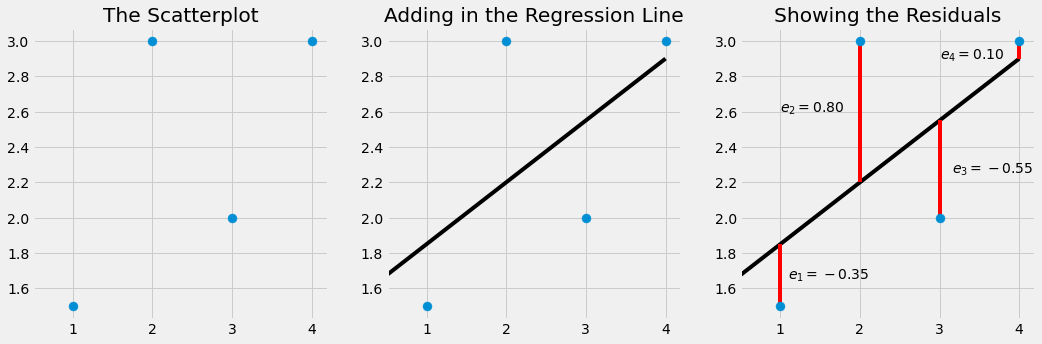

In [4]:
from hidden_demos import residual_demo

residual_demo()

The sum of the squared errors (SSE) is:

$$ SSE = \sum_{i = 1}^n (y_i - \hat{y}_i)^2 = \sum_{i = 1}^n e_i^2$$

The mean of the squared errors (MSE) is:

$$ MSE = \frac{1}{n} SSE = \frac{1}{n} \sum_{i = 1}^n (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i = 1}^n e_i^2$$

And finally, the root mean squared error (RMSE) is:

$$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} SSE} = \sqrt{\frac{1}{n} \sum_{i = 1}^n (y_i - \hat{y}_i)^2} = \sqrt{\frac{1}{n} \sum_{i = 1}^n e_i^2}$$

What we call the regression line is the line that passes through the scatterplot with the smallest possible value of the RMSE.  

If the widgets work, move the sliders around to change the slope and intercept of the line below, which will change the RMSE.  


In [5]:
xx = make_array(1,2,3,4)
yy = make_array(1.5, 3, 2, 3)

import ipywidgets as widgets

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

def plot_func(slope, intercept):
    x = np.linspace(0, 5)
    y = x*slope + intercept
    plt.scatter(xx,yy, s=50)
    plt.ylim(-1,6)
    plt.xlim(0,5)
    plt.plot([1,1],[1.5,slope+intercept], color="red")
    plt.plot([2,2],[3, 2*slope+intercept], color ='red')
    plt.plot([3,3],[2, 3*slope+intercept], color ='red')
    plt.plot([4,4],[3, 4*slope+intercept], color="red")
    rmse = np.round(((1.5-slope-intercept)**2 + 
                     (3-2*slope-intercept)**2 + 
                     (2-3*slope-intercept)**2 + 
                     (3-4*slope-intercept)**2)**0.5, 3)
    plt.plot(x, y)
    plt.text(1,5, f"RMSE = {rmse}", color="red", size='large')

interact(plot_func, slope = widgets.FloatSlider(value=.35, min=-1, max=1.0, step=0.15), 

         intercept=widgets.FloatSlider(value=1.5, min=-1, max=2.5, step=0.1));

hide_code()

interactive(children=(FloatSlider(value=0.35, description='slope', max=1.0, min=-1.0, step=0.15), FloatSlider(…

## Assumptions of Linear Regression ##


If you're performing a linear regression analysis, there are some things you should check before drawing any conclusions from the analysis.


1. Is the apparent relationship approximately linear?


2. Are the residuals approximately normal?


3. Are the residuals homoscedastic?  That means that if you plot them versus their original x-values, do they show approximately the same vertical spread as we look left to right?

4. Verify there are no outliers or influential points that may be skewing your results.

5. Are the y-values independent from each other?





## Checking these Assumptions ##

### Assumption 1: Linearity ### 

To verify that the relationship is approximately linear, simply observe the scatterplot of your data.  You should **always** look at the scatterplot anyway.  You can also do a cursory check of assumption 4 while looking at the scatterplot. 


''

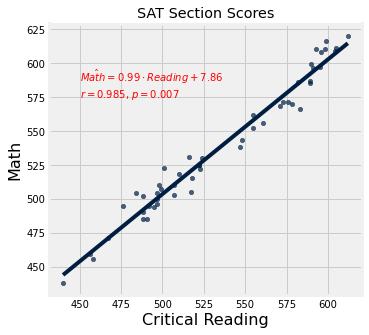

In [6]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014.scatter("Critical Reading", "Math", fit_line=True)
plots.title("SAT Section Scores")
plots.text(450, 575, "$\hat{Math} = 0.99\cdot Reading + 7.86$\n$r = 0.985$, $p  =0.007$", size='medium', color='red')
;

### Assumption 2: Normality ###

Make a histogram of the residuals, and/or run a test for normality on the residuals.  

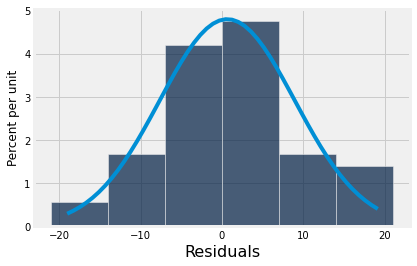

In [7]:
def sat_line(x):
    return 0.99*x+7.86

Predicted_Math = sat2014.apply(sat_line, "Critical Reading")
Residuals = sat2014.column("Math") - Predicted_Math


Table().with_column("Residuals", Residuals).hist(bins = np.arange(-21, 22, 7))
mu, sigma = scipy.stats.norm.fit(Residuals)
best_fit_line = scipy.stats.norm.pdf(np.linspace(min(Residuals),max(Residuals)), mu, sigma)
plt.plot(np.linspace(min(Residuals),max(Residuals)), best_fit_line);

In [8]:
stats.normaltest(Residuals)

NormaltestResult(statistic=0.6065252123190028, pvalue=0.7384051611637781)

In [9]:
stats.shapiro(Residuals)

(0.9780495166778564, 0.45968225598335266)

These tests both start with the null hypothesis that the data is normal; so a large p-value suggests that the data is at least approximately normal.  



### Assumptions 3 and 4: Homoscedasticity and Outliers/Influential Points ###

Make a scatterplot of the residuals versus the x-value.  Even better, first divide the residuals by their own standard deviation (this transforms them into something we call the Standardized Residuals).  


If there are no standardized residuals above +3 or below -3, then you don't have any outliers.  


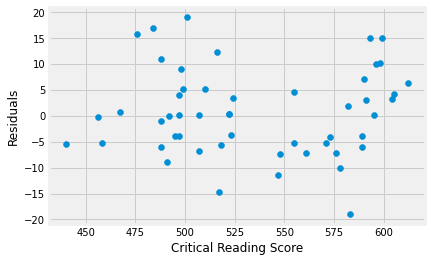

In [10]:
Reading = sat2014.column("Critical Reading")

plots.scatter(Reading, Residuals)
plots.ylabel("Residuals")
plots.xlabel("Critical Reading Score");

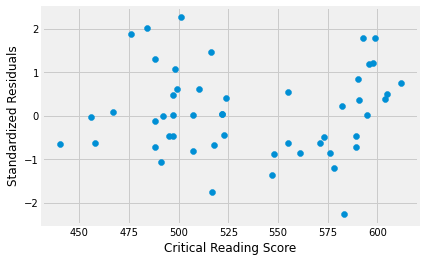

In [11]:
StdRes = Residuals/stats.tstd(Residuals)
plots.scatter(Reading, StdRes)
plots.ylabel("Standardized Residuals")
plots.xlabel("Critical Reading Score");

### Assumption 5: Independence ###

This assumption probably best verified by knowing how the data was collected.  If the data was collected in a way that linked the observations together, such as time-series data, then linear regression may be inappropriate.  

As a statistician, if someone brings you data but won't disclose the manner in which this data was collected, you probably should refuse to analyze it for them.  For ethical reasons, sure, but also because there are many assumptions in statistics, like independence of observations, that can really only be verified if you understand where the data originated.  



### Famous Anscombe's Quartet ###

The next example is really four examples combined into 1.  They are a famous quartet of data sets, specifically designed to show the importance of scatterplotting our data *before* drawing conclusions from a regression analysis.  


In [12]:
anscombe = Table.read_table("anscombe.csv")

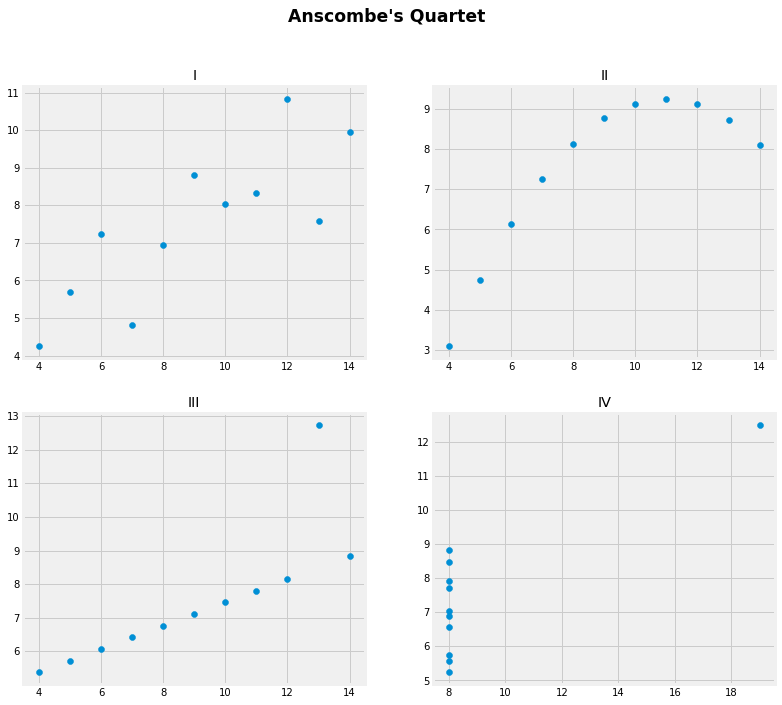

In [13]:
from hidden_demos import anscombe1, anscombe2

anscombe1()

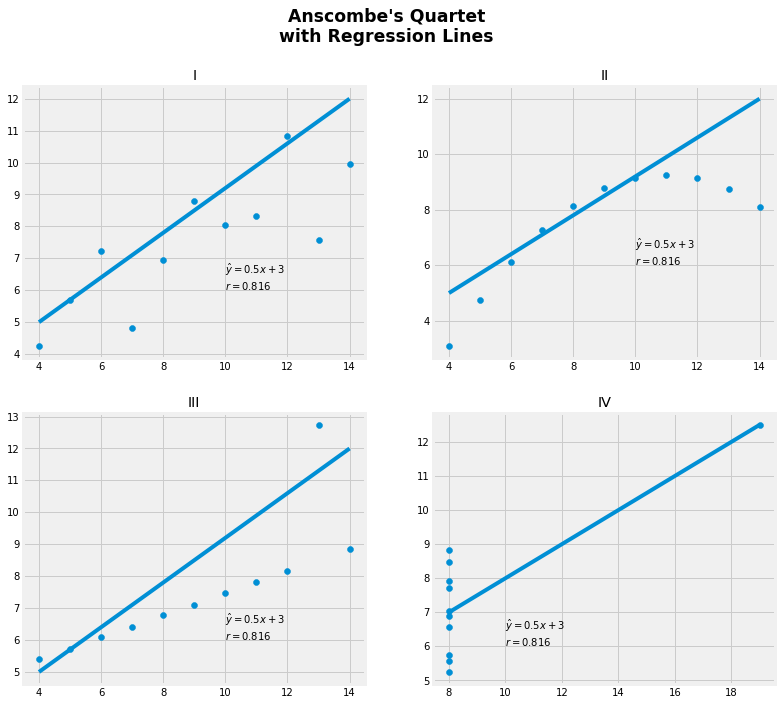

In [14]:
anscombe2()

In [15]:
stats.linregress(anscombe.column('x1'),anscombe.column('y1'))

LinregressResult(slope=0.5000909090909091, intercept=3.0000909090909103, rvalue=0.8164205163448399, pvalue=0.00216962887307879, stderr=0.11790550059563408)

## Interpolation vs Extrapolation

One of the main purposes of linear regression analysis is to produce a linear function that can be used for predictions.  

When you choose an x-value that falls inside the range of the x-values involved in the study, and make a prediction for that x, this is called **interpolation** and is generally accepted.  

When you attempt to make a prediction for an x-value that falls outside the range studied, that is called **extrapolation** and is not always acceptable.  There are times when extrapolation is necessary, but any extrapolated results should be regarded with a bit of caution.  To see why, consider the following data regarding the height and age of a small child.  


In [16]:
Age = make_array(3, 6, 9, 12, 15)
Height = make_array(60, 65, 68, 73, 77)

stats.linregress(Age, Height)

LinregressResult(slope=1.4000000000000001, intercept=55.99999999999999, rvalue=0.9977401101057177, pvalue=0.00012891917100993504, stderr=0.05443310539518201)

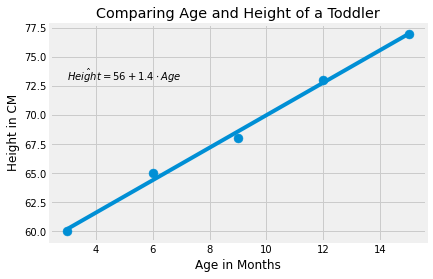

In [17]:
plots.scatter(Age, Height, s=80)
plots.xlabel("Age in Months")
plots.ylabel("Height in CM")
plots.title("Comparing Age and Height of a Toddler")
plots.text(3, 73, "$\hat{Height} = 56+1.4\cdot Age$")
plots.plot([3,15],[1.4*3+56,1.4*15+56]);


When this toddler turns 40 years old, what height does this equation predict?

$$\hat{Height} = 56 + 1.4\cdot40\cdot 12 = 728 cm$$

For the record, 728 cm is nearly 24 feet tall.  


## Optional/Advanced Topic ##

### Prediction Bands ###

It is possible to construct a 95% prediction interval around each $\hat{y}_i$ or any $\hat{y}$ for any $x$.  

$$ \hat{y} \pm t^*\sqrt{MSE\left(1+ \frac{1}{n} + \frac{\left(\,x - \overline{x}\,\right)^2}{S_x}\right)}$$


Where $t^*$ is the value from the t-distribution that captures the middle 95% of the distribution with $n-2$ degrees of freedom. 

Also, $\displaystyle MSE = \frac{1}{n-2} \sum_{i=1}^n(y_i-\hat{y}_i)^2$


When we make this calculation for a range of x-values that contains all the x-values in our data and add them to the scatterplot they form prediction bands.  

In [18]:
stats.linregress( hybrid.column('mpg'), hybrid.column("msrp"))

LinregressResult(slope=-1038.2589604031507, intercept=75448.19998546391, rvalue=-0.5318263633683783, pvalue=1.5068959887138428e-12, stderr=134.54129362681866)

In [19]:
hybrid.num_rows

153

329079697.34692687


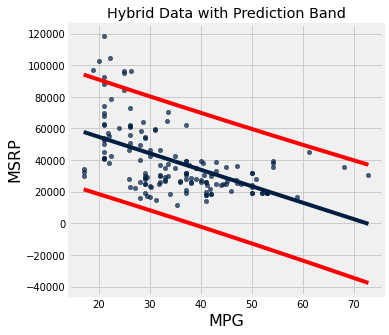

In [20]:
xbar = np.mean(hybrid.column('mpg'))
Sxx = sum((hybrid.column('mpg')-xbar)**2)
df = 153

def prediction_line(x):
    return 75448.20-1038.26*x

mse = sum((hybrid.apply(prediction_line, 'mpg') - hybrid.column('msrp'))**2)/(df-1)

print(mse)

tstar = stats.t.ppf(0.975, df)


def prediction_int_low(x):
    stderr = np.sqrt(mse*(1+(df+1)**(-1) + (x-xbar)**2/Sxx))
    return prediction_line(x)- tstar*stderr

def prediction_int_hi(x):
    stderr = np.sqrt(mse*(1+(df+1)**(-1) + (x-xbar)**2/Sxx))
    return prediction_line(x)+ tstar*stderr
    

x=hybrid.sort('mpg').column('mpg')    
y1 = hybrid.with_column("Lower Bound",hybrid.apply(prediction_int_low, 'mpg')).sort('mpg').column('Lower Bound')
y2 = hybrid.with_column("Upper Bound",hybrid.apply(prediction_int_hi, 'mpg')).sort('mpg').column('Upper Bound')

hybrid.scatter('mpg', 'msrp', fit_line=True)
plots.plot(x,y1, color='red')
plots.plot(x,y2, color='red')
plots.title("Hybrid Data with Prediction Band")
plots.ylabel("MSRP")
plots.xlabel("MPG");

Notice that the prediction interval is slightly more narrow in the middle of the MPG's and grows wider at the far right side of the data.  As we move further to the right (or to the far left), the prediction interval will continue to widen.  

In [21]:
prediction_int_hi(40) - prediction_int_low(40)

71961.76016767934

In [22]:
prediction_int_hi(80) - prediction_int_low(80)

75792.58693897567

## Confidence Bands

The prediction bands above dealt with the interval that you might expect a single ''next'' prediction to land inside.  As has been the case in the past, when we discuss confidence intervals we are discussing the mean of some population.  Furthermore, averages are more stable than single observations.  Therefore, the 95% confidence interval around the mean tends to be smaller than the same interval around a new prediction.  


$$ \hat{y} \pm t^*\sqrt{MSE\left(\frac{1}{n} + \frac{\left(\,x - \overline{x}\,\right)^2}{S_x}\right)}$$


329079697.34692687


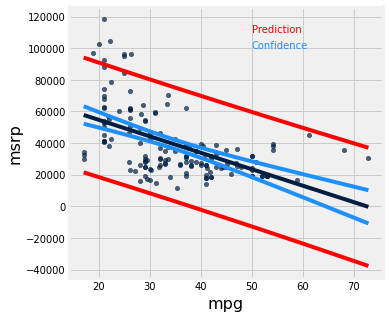

In [23]:
xbar = np.mean(hybrid.column('mpg'))
Sxx = sum((hybrid.column('mpg')-xbar)**2)
df = 153

def prediction_line(x):
    return 75448.20-1038.26*x

mse = sum((hybrid.apply(prediction_line, 'mpg') - hybrid.column('msrp'))**2)/(df-1)

print(mse)

tstar = stats.t.ppf(0.975, df)


def confidence_int_low(x):
    stderr = np.sqrt(mse*((df+1)**(-1) + (x-xbar)**2/Sxx))
    return prediction_line(x)- tstar*stderr

def confidence_int_hi(x):
    stderr = np.sqrt(mse*((df+1)**(-1) + (x-xbar)**2/Sxx))
    return prediction_line(x)+ tstar*stderr
    

x=hybrid.sort('mpg').column('mpg')    
y3 = hybrid.with_column("Lower Bound",hybrid.apply(confidence_int_low, 'mpg')).sort('mpg').column('Lower Bound')
y4 = hybrid.with_column("Upper Bound",hybrid.apply(confidence_int_hi, 'mpg')).sort('mpg').column('Upper Bound')

hybrid.scatter('mpg', 'msrp', fit_line=True)
#plots.ylim(-200000,300000)
plots.plot(x,y3, color="dodgerblue")
plots.plot(x,y4, color="dodgerblue")
plots.plot(x,y1, color="red")
plots.plot(x,y2, color="red")
plots.text(50, 110000,"Prediction", color='red')
plots.text(50, 100000,"Confidence", color='dodgerblue');

328.0524661979032
1.961988434080554


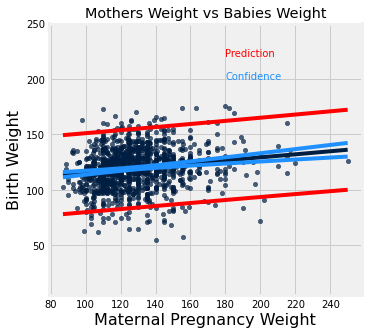

In [25]:
births = Table.read_table('baby.csv')

mytable = births
xvariable = "Maternal Pregnancy Weight"
yvariable = "Birth Weight"


def bands(mytable, xvariable, yvariable):
    Results = stats.linregress(mytable.column(xvariable), mytable.column(yvariable))

    xbar = np.mean(mytable.column(xvariable))
    Sxx = sum((mytable.column(xvariable)-xbar)**2)
    df = mytable.num_rows - 1

    def prediction_line(x):
        return Results[0]*x + Results[1]

    mse = sum((mytable.apply(prediction_line, xvariable) - mytable.column(yvariable))**2)/(df-1)

    print(mse)

    tstar = stats.t.ppf(0.975, df)

    print(tstar)

    def prediction_int_low(x):
        stderr = np.sqrt(mse*(1+(df+1)**(-1) + (x-xbar)**2/Sxx))
        return prediction_line(x)- tstar*stderr

    def prediction_int_hi(x):
        stderr = np.sqrt(mse*(1+(df+1)**(-1) + (x-xbar)**2/Sxx))
        return prediction_line(x)+ tstar*stderr
    

    x=mytable.sort(xvariable).column(xvariable)    
    y1 = mytable.with_column("Lower Bound",mytable.apply(prediction_int_low, xvariable)).sort(xvariable).column('Lower Bound')
    y2 = mytable.with_column("Upper Bound",mytable.apply(prediction_int_hi, xvariable)).sort(xvariable).column('Upper Bound')
    y3 = mytable.with_column("Lower Bound",mytable.apply(confidence_int_low, xvariable)).sort(xvariable).column('Lower Bound')
    y4 = mytable.with_column("Upper Bound",mytable.apply(confidence_int_hi, xvariable)).sort(xvariable).column('Upper Bound')


    mytable.scatter(xvariable,yvariable, fit_line=True)
    plots.ylim(5, 250)
    plots.plot(x,y1, color='red')
    plots.plot(x,y2, color='red')
    plots.plot(x,y3, color='dodgerblue')
    plots.plot(x,y4, color='dodgerblue')
    plots.title("Mothers Weight vs Babies Weight")
    plots.text(180,220,"Prediction",color='red')
    plots.text(180,200,"Confidence",color='dodgerblue');
    
bands(mytable, xvariable, yvariable)

## To summarize the difference between prediction and confidence intervals ##

Confidence:  If we took a large sample of pregnant women who all weighed 150 lbs and found the average of their babies weights, what interval is most likely to capture that average?

Prediction: If we found ONE pregnant woman that happened to weigh 150 lbs, what interval is most likely to capture the weight of her baby?